<a href="https://colab.research.google.com/github/Ubitron360/_here/blob/main/ML620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ML480--------------------import-libs----------------------------------
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
import yfinance as yf

In [16]:
DJA = yf.Ticker('^DJA')
DJA.history(period='max').to_csv('DJA.csv')

IXIC = yf.Ticker('^IXIC')
IXIC.history(period='max').to_csv('IXIC.csv')
IXCO = yf.Ticker('^IXCO')
IXCO.history(period='max').to_csv('IXCO.csv')
IXHC = yf.Ticker('^IXHC')
IXHC.history(period='max').to_csv('IXHC.csv')


GSPC = yf.Ticker('^GSPC')
GSPC.history(period='max').to_csv('GSPC.csv')

NYA = yf.Ticker('^NYA')
NYA.history(period='max').to_csv('NYA.csv')

RUT = yf.Ticker('^RUT')
RUT.history(period='max').to_csv('RUT.csv')

VIX = yf.Ticker('^VIX')
VIX.history(period='max').to_csv('VIX.csv')

DAX = yf.Ticker('^GDAXI')
DAX.history(period='max').to_csv('GDAXI.csv')

FTSE = yf.Ticker('^FTSE')
FTSE.history(period='max').to_csv('FTSE.csv')

HSI = yf.Ticker('^HSI')
HSI.history(period='max').to_csv('HSI.csv')

FVX = yf.Ticker('^FVX')
FVX.history(period='max').to_csv('FVX.csv')

IRX = yf.Ticker('^IRX')
IRX.history(period='max').to_csv('IRX.csv')

TNX = yf.Ticker('^TNX')
TNX.history(period='max').to_csv('TNX.csv')

TYX = yf.Ticker('^TYX')
TYX.history(period='max').to_csv('TYX.csv')

SPX = yf.Ticker('^SPX')
SPX.history(period='max').to_csv('SPX.csv')



# ---------------------------------------
# ---------------------------------------
# ---------------------------------------
# ---------------------------------------
# ---------------------------------------
# ---------------------------------------
# ---------------------------------------
# ---------------------------------------






In [3]:
# ML480--------------------read-transform-data--------------------------

# df_train = pd.read_excel('/content/drive/MyDrive/30YR.xlsx', sheet_name='train')
# df_test  = pd.read_excel('/content/drive/MyDrive/MARKET_360_.xlsx', sheet_name='test')
# df_train = df_train.drop('Date', axis=1)
# df_test  = df_test.drop('Date', axis=1)
# X_train  = df_train.drop('target', axis=1)
# y_train  = df_train['target']
# X_test   = df_test.drop('target', axis=1)
# y_test   = df_test['target']
# scaler_X = MinMaxScaler()
# X_train = scaler_X.fit_transform(X_train)
# X_test  = scaler_X.fit_transform(X_test)

df  = pd.read_excel('/content/drive/MyDrive/1. MAIN/30YR.xlsx', sheet_name='X-train')
df  = df.drop('Date', axis=1)

dft = pd.read_excel('/content/drive/MyDrive/1. MAIN/30YR.xlsx', sheet_name='X-test')
dft = dft.drop('Date', axis=1)

df.columns
dft.columns

Index(['Day', 'Month', 'Year', 'DT Val', 'DJA2', 'DJA22', 'DJA3', 'DJA32',
       'DJA4', 'DJA42', 'DJA5', 'DJA52', 'IXIC2', 'IXIC22', 'IXIC3', 'IXIC32',
       'IXIC4', 'IXIC42', 'IXIC5', 'IXIC52', 'GSPC2', 'GSPC22', 'GSPC3',
       'GSPC32', 'GSPC4', 'GSPC42', 'GSPC5', 'GSPC52', 'NYA2', 'NYA3', 'NYA4',
       'NYA5', 'RUT2', 'RUT3', 'RUT4', 'RUT5', 'VIX2', 'VIX3', 'VIX4', 'VIX5',
       'GDAXI2', 'GDAXI3', 'GDAXI4', 'GDAXI5', 'FTSE2', 'FTSE3', 'FTSE4',
       'FTSE5', 'HSI2', 'HSI22', 'HSI3', 'HSI32', 'HSI4', 'HSI42', 'HSI5',
       'HSI52', 'FVX2', 'FVX3', 'FVX4', 'FVX5', 'IRX2', 'IRX3', 'IRX4', 'IRX5',
       'TNX2', 'TNX3', 'TNX4', 'TNX5', 'TYX2', 'TYX3', 'TYX4', 'TYX5'],
      dtype='object')

In [12]:
dft.columns

# dft.shape

# df.shape

Index(['Day', 'Month', 'Year', 'DT Val', 'DJA2', 'DJA22', 'DJA3', 'DJA32',
       'DJA4', 'DJA42', 'DJA5', 'DJA52', 'IXIC2', 'IXIC22', 'IXIC3', 'IXIC32',
       'IXIC4', 'IXIC42', 'IXIC5', 'IXIC52', 'GSPC2', 'GSPC22', 'GSPC3',
       'GSPC32', 'GSPC4', 'GSPC42', 'GSPC5', 'GSPC52', 'NYA2', 'NYA3', 'NYA4',
       'NYA5', 'RUT2', 'RUT3', 'RUT4', 'RUT5', 'VIX2', 'VIX3', 'VIX4', 'VIX5',
       'GDAXI2', 'GDAXI3', 'GDAXI4', 'GDAXI5', 'FTSE2', 'FTSE3', 'FTSE4',
       'FTSE5', 'HSI2', 'HSI22', 'HSI3', 'HSI32', 'HSI4', 'HSI42', 'HSI5',
       'HSI52', 'FVX2', 'FVX3', 'FVX4', 'FVX5', 'IRX2', 'IRX3', 'IRX4', 'IRX5',
       'TNX2', 'TNX3', 'TNX4', 'TNX5', 'TYX2', 'TYX3', 'TYX4', 'TYX5'],
      dtype='object')

Epoch 1/35
280/280 [==============================] - 5s 4ms/step - loss: 0.4021 - accuracy: 0.8187
Epoch 2/35
280/280 [==============================] - 2s 7ms/step - loss: 0.3230 - accuracy: 0.8691
Epoch 3/35
280/280 [==============================] - 2s 6ms/step - loss: 0.3030 - accuracy: 0.8751
Epoch 4/35
280/280 [==============================] - 2s 6ms/step - loss: 0.2855 - accuracy: 0.8814
Epoch 5/35
280/280 [==============================] - 1s 4ms/step - loss: 0.2800 - accuracy: 0.8830
Epoch 6/35
280/280 [==============================] - 1s 4ms/step - loss: 0.2724 - accuracy: 0.8881
Epoch 7/35
280/280 [==============================] - 1s 4ms/step - loss: 0.2737 - accuracy: 0.8851
Epoch 8/35
280/280 [==============================] - 1s 4ms/step - loss: 0.2577 - accuracy: 0.8960
Epoch 9/35
280/280 [==============================] - 1s 4ms/step - loss: 0.2608 - accuracy: 0.8923
Epoch 10/35
280/280 [==============================] - 2s 6ms/step - loss: 0.2561 - accuracy: 0.8943

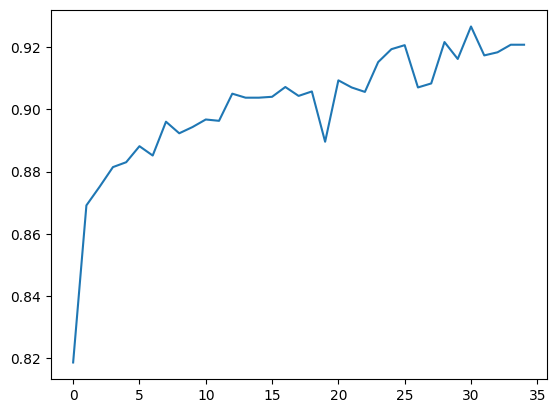

In [25]:
X = df.drop('IXIC5' , axis=1)
X = X .drop('IXIC52', axis=1)
y = df['IXIC52']

# X = df.drop('IXIC4' , axis=1)
# X = X .drop('IXIC42', axis=1)
# y = df['IXIC42']

# X = df.drop('IXIC3' , axis=1)
# X = X .drop('IXIC32', axis=1)
# y = df['IXIC32']

# X = df.drop('IXIC2' , axis=1)
# X = X .drop('IXIC22', axis=1)
# y = df['IXIC22']

X = MinMaxScaler().fit_transform(X)



# ML480-----------------------train-model----------------------------------
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(X.shape[1],)))
model.add(tf.keras.layers.Dense(64,  activation='relu'  , use_bias=True,   ) )
model.add(tf.keras.layers.Dense(32,  activation='relu'  , use_bias=True,   ) )
model.add(tf.keras.layers.Dense(32,  activation='relu'  , use_bias=True,   ) )
model.add(tf.keras.layers.Dense(64,  activation='relu'  , use_bias=True,   ) )
model.add(tf.keras.layers.Dense(128, activation='relu'  , use_bias=True,  ) )
model.add(tf.keras.layers.Dense(128, activation='relu'  , use_bias=True,  ) )
model.add(tf.keras.layers.Dense(128, activation='relu'  , use_bias=True,  ) )
model.add(tf.keras.layers.Dense(128, activation='relu'  , use_bias=True,  ) )
model.add(tf.keras.layers.Dense(64, activation='relu'   , use_bias=True,  ) )
model.add(tf.keras.layers.Dense(64, activation='relu'   , use_bias=True,  ) )
model.add(tf.keras.layers.Dense(64, activation='relu'   , use_bias=True,  ) )
model.add(tf.keras.layers.Dense(32, activation='relu'   , use_bias=True,  ) )
model.add(tf.keras.layers.Dense(32, activation='relu'   , use_bias=True,  ) )
model.add(tf.keras.layers.Dense(32, activation='relu'   , use_bias=True,  ) )
model.add(tf.keras.layers.Dense(16, activation='relu'   , use_bias=True,  ) )
model.add(tf.keras.layers.Dense(16, activation='relu'   , use_bias=True,  ) )
model.add(tf.keras.layers.Dense(16, activation='relu'   , use_bias=True,  ) )
model.add(tf.keras.layers.Dense(1 , activation ='sigmoid',use_bias = True,) )


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, y , batch_size= 25  , epochs =35)

plt.plot(model.history.history['accuracy'])
plt.show()

In [29]:
Xt = dft.drop('IXIC5' , axis=1)
Xt = Xt.drop('IXIC52', axis=1)
yt = dft['IXIC52']
Xt = MinMaxScaler().fit_transform(Xt)


# model.fit(Xt, yt, epochs=10)

model.evaluate(Xt,yt)


124/124 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8787


[0.31936410069465637, 0.878726601600647]